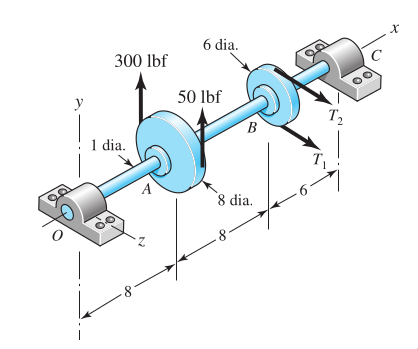

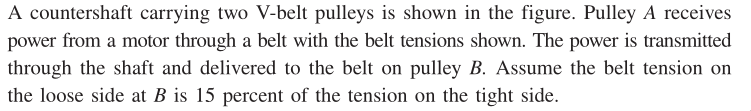

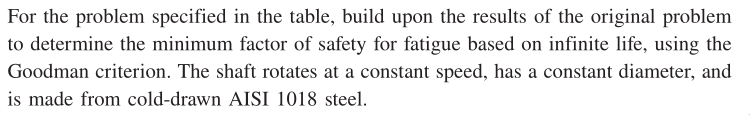

In [1]:
from math import log, pi

We first need to determine the tension in the belt on pulley B. For this, we use torque balance, noting that the torque on the shaft through pulley A is exactly balanced by the torque on the shaft through pulley B. 

Next, we need to determine the bending moments. And, for that we have to go through the entire process of determining the reaction forces, the SFD and the BMD. 

VERY IMPORTANT: There will be two separate SFD and BMD pairs: one for the $xy$-plane and another one for the $xz$-plane. 

Since the bending moments are in two separate planes, we have to take the resultants. The location of the highest magnitude of the resultant moment will have to be found. 

Because the shaft is rotating, the bending (or flexural stress) due to the bending moment ($M$) will be completely reversed. However, the shear stress due to the torsion ($T$) will be a steady value. 

So:

$\sigma_a = \dfrac{32 M}{\pi d^3}, \quad \tau_a = 0$

$\sigma_m = 0, \quad \tau_m = \dfrac{16 T}{\pi d^3}$

Here, $d$ is the shaft diameter (not the pulley diameter). 


Check for first-cycle yielding:

$\sigma_{\rm max}^\prime = [(\sigma_m + \sigma_a)^2 + 3 (\tau_m + \tau_a)^2]^{1/2}$

$n_s = \dfrac{S_y}{\sigma_{\rm max}^\prime}$


Then, for fatigue, as usual we have to determine:

$\sigma_a^\prime = (\sigma_a^2 + 3 \tau_a^2)^{1/2}$

$\sigma_m^\prime = (\sigma_m^2 + 3 \tau_m^2)^{1/2}$

Finally, for the fatigue factor of safety:

$n_f = \left(\dfrac{\sigma_a^\prime}{S_e} + \dfrac{\sigma_m^\prime}{S_{ut}} \right)^{-1}$

Of course, we have to be careful to first determine the corrected value of $S_e$ from the uncorrected value $S_e^\prime$ using Marin factors. 

## If the diameter is to be found:

Consider a situation where the shaft diameter is not provided. It has to be found. Then the problem is more challenging. 

The numerical values of the bending moments can still be found. 

However, the stresses will be expressed in terms of the shaft diameter. 

Of course, the desired factor of safety for infinite life has to be provided in the question. 

Another route to design could be that the number of cycles of a finite life is specified. And, a shaft diameter has to be determined corresponding to this given finite life value. 

Then, a $S_f$ value needs to be determined from the S-N diagram corresponding to the given finite life ($N$). This value of $S_f$ will be used in place of $S_e$ in the Goodman criterion:

$\dfrac{\sigma_a^\prime}{S_f} + \dfrac{\sigma_m^\prime}{S_{ut}} = 1$

## Regarding belt tension

In this problem the relationship between the tensions in the tight side and slack side of the belt on pulley B is given ($T_2 = 0.15 T_1$). 

However, sometimes this relationship may not be directly given. Instead the coefficient of friction ($\mu$) between the belt and the pulley and the wrap around angle ($\theta$) of the belt may be given. In that case the relationship will be given by (this was taught in 1st Year Basic Engineering Mechanics):

$\dfrac{T_1}{T_2} = e^{\mu \theta}$ 

Here, $\theta$ must be in radians. 

In this particular problem, since the relationship between $T_1$ and $T_2$ is given, we can determine the coefficient of friction between the belts and the pulleys. 

In [2]:
theta = pi

muA = (log(300/50))/theta
muA

muB = (log(1/0.15))/theta
muB

display(muA, muB)

0.5703347527187114

0.6038720464660196

## SFD and BMD

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sym.symbols('x')

In [3]:
L = 8+8+6
a = 8
b = 16
Py = -350
Pz = 392.16 + 58.82

In [4]:
def sf_bm(PP,aa,LL):
    RR = PP*aa/LL
    RL = PP - RR
    VL = RL
    VR = RL - PP
    ML = sym.integrate(VL,x)
    MR = (ML.subs(x,aa) + sym.integrate(VR,(x,aa,x))).expand()
    VV = sym.Piecewise((VL, x < aa), (VR, x > aa))
    MM = sym.Piecewise((ML,x<=aa), (MR,x>aa))
    return VV, MM

In [5]:
V1, M1 = sf_bm(Py,a,L)
display(V1, M1)

Piecewise((-222.727272727273, x < 8), (127.272727272727, x > 8))

Piecewise((-222.727272727273*x, x <= 8), (127.272727272727*x - 2800.0, True))

In [6]:
V2, M2 = sf_bm(Pz,b,L)
display(V2, M2)

Piecewise((122.994545454545, x < 16), (-327.985454545455, x > 16))

Piecewise((122.994545454545*x, x <= 16), (7215.68 - 327.985454545455*x, True))

In [7]:
V1_lamb = sym.lambdify(x, V1)

M1_lamb = sym.lambdify(x, M1)

V2_lamb = sym.lambdify(x, V2)

M2_lamb = sym.lambdify(x, M2)

In [8]:
N = 1001
xx = np.linspace(0,L,N)

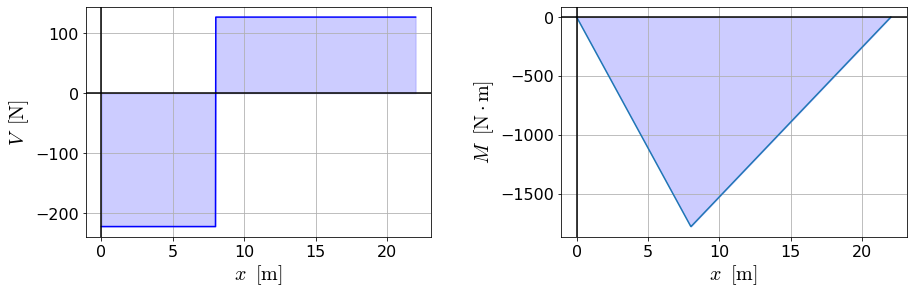

In [9]:
%matplotlib inline

from matplotlib import rcParams

rcParams['font.size']=16
rcParams['mathtext.fontset']='cm'

#fig, axes = plt.subplots(1,2,tight_layout=True)

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax2 = fig.add_axes([1.2,0.1,0.8,0.8])

#plt.subplot(1,2,1)
ax1.plot(xx,V1_lamb(xx),'blue')
ax1.set_xlabel(r'$x\;\; [{\rm m}]$',fontsize=20)
ax1.set_ylabel(r'$V\;\; [{\rm N}]$',fontsize=20)
ax1.axhline(y=0,color='k')
ax1.axvline(x=0,color='k')
ax1.fill_between(xx,V1_lamb(xx),color='blue',alpha=0.2)
#ax1.set_yticks([0, -4, -10, 12], minor=False)
#ax1.set_xticks([3,6], minor=False)
ax1.grid(True)

ax2.plot(xx,M1_lamb(xx))
ax2.set_xlabel(r'$x\;\; [{\rm m}]$',fontsize=20)
ax2.set_ylabel(r'$M\;\; [{\rm N}\cdot {\rm m}]$',fontsize=20)
ax2.axhline(y=0,color='k')
ax2.axvline(x=0,color='k')
ax2.fill_between(xx,M1_lamb(xx),color='blue',alpha=0.2)
#ax2.set_yticks([0,-18], minor=False)
#ax2.set_xticks([3,6], minor=False)
ax2.grid(True)

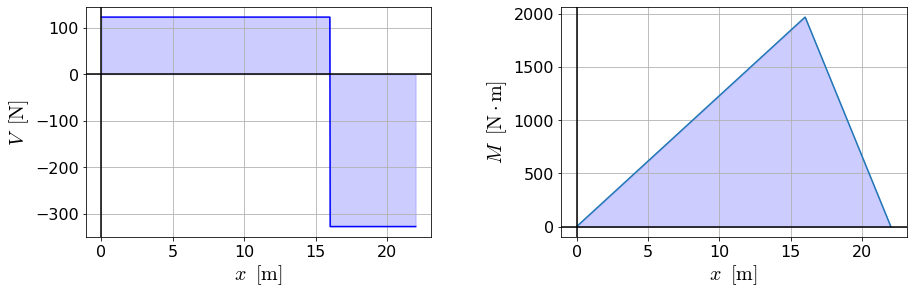

In [10]:
%matplotlib inline

from matplotlib import rcParams

rcParams['font.size']=16
rcParams['mathtext.fontset']='cm'

#fig, axes = plt.subplots(1,2,tight_layout=True)

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax2 = fig.add_axes([1.2,0.1,0.8,0.8])

#plt.subplot(1,2,1)
ax1.plot(xx,V2_lamb(xx),'blue')
ax1.set_xlabel(r'$x\;\; [{\rm m}]$',fontsize=20)
ax1.set_ylabel(r'$V\;\; [{\rm N}]$',fontsize=20)
ax1.axhline(y=0,color='k')
ax1.axvline(x=0,color='k')
ax1.fill_between(xx,V2_lamb(xx),color='blue',alpha=0.2)
#ax1.set_yticks([0, -4, -10, 12], minor=False)
#ax1.set_xticks([3,6], minor=False)
ax1.grid(True)

ax2.plot(xx,M2_lamb(xx))
ax2.set_xlabel(r'$x\;\; [{\rm m}]$',fontsize=20)
ax2.set_ylabel(r'$M\;\; [{\rm N}\cdot {\rm m}]$',fontsize=20)
ax2.axhline(y=0,color='k')
ax2.axvline(x=0,color='k')
ax2.fill_between(xx,M2_lamb(xx),color='blue',alpha=0.2)
#ax2.set_yticks([0,-18], minor=False)
#ax2.set_xticks([3,6], minor=False)
ax2.grid(True)

In [11]:
Mres = np.sqrt((M1_lamb(xx))**2 + (M2_lamb(xx))**2)
display(Mres)

array([0.00000000e+00, 5.59748038e+00, 1.11949608e+01, ...,
       1.54797982e+01, 7.73989909e+00, 1.16205523e-11])

In [12]:
Mres_max = max(Mres)
display(Mres_max)

xx[np.argmax(Mres)]

2110.470065265328

15.994

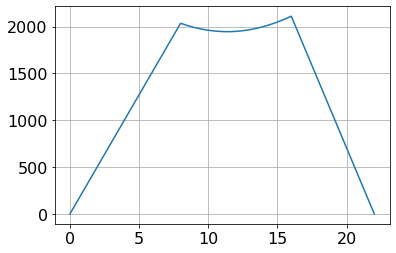

In [13]:
plt.plot(xx,Mres)
plt.grid(True)